# IRISpy Spectrograph

In [110]:
from irispy.spectrograph import IRISSpectrograph
from sunpycube.cube.datacube import Cube, CubeSequence
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from irispy.data import sample
from IPython.display import HTML
sample.RASTER
%matplotlib inline
plt.rcParams.update({'figure.dpi': 100,'font.size':6})

In [111]:
sample.RASTER
testfile='/Users/shelbe/sunpy/raster/iris_l2_20170502_095734_3620250135_raster_t000_r00000.fits'

In [112]:
sg=IRISSpectrograph(testfile)

In [113]:
sg.spectral_windows

name,detector type,brightest wavelength,min wavelength,max wavelength
,,Angstrom,Angstrom,Angstrom
str12,str4,float64,float64,float64
C II 1336,FUV1,1335.70996094,1332.75413016,1337.4528902
Fe XII 1349,FUV1,1349.43005371,1347.73305029,1350.74441032
O I 1356,FUV1,1355.59997559,1352.30201033,1356.53349037
Si IV 1394,FUV2,1393.7800293,1390.94806787,1395.95974787
Si IV 1403,FUV2,1402.77001953,1398.68182787,1406.11030787
2832,NUV,2832.89291545,2831.58172549,2834.20410541
2814,NUV,2814.61263601,2812.89408606,2816.33118595
Mg II k 2796,NUV,2796.19995117,2793.31534666,2806.55454625


In [114]:
window = sg.spectral_windows["name"]

'Mg II k 2796'

### Plotting Spectra

In [123]:
c=sg.data[window[0]]
si=(sg.data[window[3]],sg.data[window[4]])
mg=sg.data[window[7]]

/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1154: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1108: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/

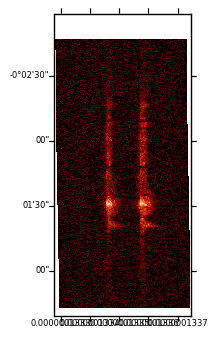

/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1154: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1108: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/

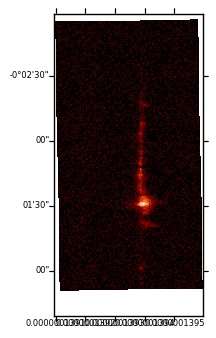

/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1154: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1108: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/

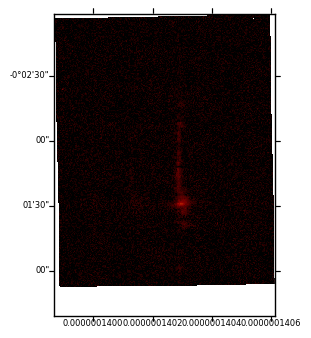

/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1154: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1108: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/

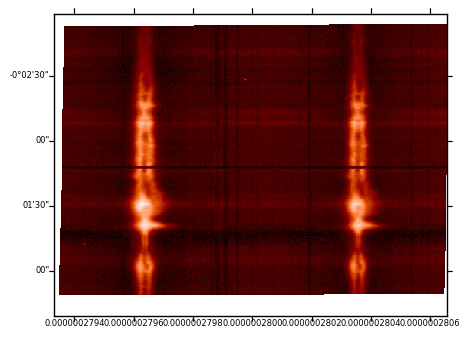

In [128]:
#Plot functions are 
c.plot_x_slice(0, cmap='irissji1330',norm=colors.PowerNorm(.6))
plt.show()
si[0].plot_x_slice(0, cmap='irissji1330',norm=colors.PowerNorm(.6))
plt.show()
si[1].plot_x_slice(0, cmap='irissji1330',norm=colors.PowerNorm(.6))
plt.show()
mg.plot_x_slice(0, cmap='irissji1330',norm=colors.PowerNorm(.5))
plt.show()

AttributeError: 'Cube' object has no attribute 'plot'

### Useful functions

In [ ]:
sg

In [ ]:
sg.meta

In [43]:
 sg.auxiliary_data

TIME,PZTX,PZTY,FUV EXPOSURE TIME,NUV EXPOSURE TIME,SUMSPTRF,SUMSPATF,SUMSPTRN,SUMSPATN,DSRCFIX,DSRCNIX,LUTIDF,LUTIDN,XCENIX,YCENIX,OBS_VRIX,OPHASEIX,PC1_1IX,PC1_2IX,PC2_1IX,PC2_2IX,PC3_1IX,PC3_2IX,PC3_3IX,PC2_3IX,IT01PFUV,IT06TFUV,IT14SFUV,IT15SFUV,IT16SFUV,IT17SFUV,IT18SFUV,IT19SFUV,POFFXFUV,POFFYFUV,POFFFFUV,IT01PNUV,IT06TNUV,IT14SNUV,IT15SNUV,IT16SNUV,IT17SNUV,IT18SNUV,IT19SNUV,POFFXNUV,POFFYNUV,POFFFNUV,scan
s,arcsec,arcsec,s,s,,,,,,,,,arcsec,arcsec,m / s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5
0.17,-3.1014688015,0.6063580513,0.999118983746,0.999158024788,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-178.338801969,253.539650808,-736.826416016,0.0966171994805,1.0,-0.0,0.0,0.999936521053,0.0,0.00536734111859,0.999936521053,-0.0236519605546,44.678188324,24.2409057617,19.0009040833,21.9090957642,18.9645252228,21.4890956879,24.5599994659,6.69000005722,-0.759999990463,14.5900001526,55.0,44.6782112122,24.2408943176,19.0008945465,21.9091053009,18.9644756317,21.4891052246,24.5599994659,6.69000005722,2.23000001907,-6.01000022888,51.0,scan0
2.43,-2.75226688385,0.607842683792,0.999100029469,0.999185025692,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-177.988600281,253.537914028,-736.588684082,0.0970014929771,1.0,-0.0,0.0,0.999936461449,0.0,0.00536928033805,0.999936461449,-0.0236605060041,44.6774368286,24.2412815094,19.0012817383,21.9087181091,18.9664077759,21.4887180328,24.5599994659,6.69000005722,-0.759999990463,14.5900001526,55.0,44.6774597168,24.2412700653,19.0012702942,21.9087295532,18.9663505554,21.4887294769,24.5599994659,6.69000005722,2.23000001907,-6.0,51.0,scan0
4.61,-2.4030649662,0.609327018261,0.999146997929,0.999225974083,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-177.638391917,253.536205044,-736.354003906,0.097375549376,1.0,-0.0,0.0,0.999936461449,0.0,0.00537114990356,0.999936461449,-0.0236687445134,44.6767082214,24.241645813,19.0016441345,21.9083557129,18.9682254791,21.4883556366,24.5599994659,6.69000005722,-0.759999990463,14.6000003815,55.0,44.6767311096,24.2416343689,19.0016345978,21.9083652496,18.9681758881,21.4883651733,24.5599994659,6.69000005722,2.23000001907,-5.98999977112,51.0,scan0
7.14,-2.05386257172,0.610811710358,0.999135017395,0.999180972576,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-177.288029366,253.534590334,-736.078186035,0.0978059619665,1.0,-0.0,0.0,0.999936401844,0.0,0.00537332115501,0.999936401844,-0.0236783124452,44.6758651733,24.242067337,19.0020675659,21.9079341888,18.9703330994,21.4879341125,24.5599994659,6.69000005722,-0.759999990463,14.6099996567,55.0,44.6758918762,24.2420558929,19.0020542145,21.9079456329,18.9702758789,21.4879455566,24.5599994659,6.69000005722,2.23000001907,-5.98000001907,51.0,scan0
9.38,-1.70466065407,0.61229634285,0.999121010303,0.999182999134,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-176.937810761,253.532884071,-735.828979492,0.0981885567307,1.0,-0.0,0.0,0.999936342239,0.0,0.0053752430719,0.999936342239,-0.0236867816484,44.6751213074,24.24243927,19.0024394989,21.9075603485,18.9722003937,21.4875602722,24.5599994659,6.69000005722,-0.769999980927,14.6099996567,55.0,44.6751441956,24.2424278259,19.0024280548,21.9075717926,18.9721412659,21.4875717163,24.5599994659,6.69000005722,2.23000001907,-5.96999979019,51.0,scan0
11.64,-1.35545837879,0.613780677319,0.999167025089,0.999221980572,2.0,1.0,1.0,1.0,1.50999999046,1.50999999046,4.0,4.0,-176.588521956,253.530534218,-735.573486328,0.0985745638609,1.0,-0.0,0.0,0.999936342239,0.0,0.0053754036753,0.999936342239,-0.0236874893703,44.6743659973,24.242816925,19.0028171539,21.9071826935,18.9740829468,21.4871826172,24.5599994659,6.690

In [58]:
print(sg.coord_names_index_as_cube,'\n',sg.data[window[7]][0])

AttributeError: 'Cube' object has no attribute 'get'

In [49]:
sg.coord_names

('raster number', 'x', 'y', 'wavelength')